In [1]:
# imports needed

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
import wrangle
import env

# Exploring
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

# Default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

# Split and scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# After yesterday's Data Wrangling lesson, I have a .csv file of the Zillow data to access

df = pd.read_csv('zillow.csv')
df

,Unnamed: 0,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,0,1087254,10711855,nan,nan,nan,2.00,3.00,nan,8.00,...,"60,371,132,321,007.00",-0.01,2017-07-07,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
1,1,1072280,10711877,1.00,nan,nan,2.00,4.00,nan,8.00,...,"60,371,132,321,007.00",0.02,2017-08-29,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
2,2,1340933,10711888,1.00,nan,nan,2.00,4.00,nan,8.00,...,"60,371,132,321,007.00",0.08,2017-04-04,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
3,3,1878109,10711910,nan,nan,nan,2.00,3.00,nan,8.00,...,"60,371,132,321,008.00",-0.04,2017-03-17,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,4,2190858,10711923,nan,nan,nan,2.00,4.00,nan,8.00,...,"60,371,132,321,008.00",-0.01,2017-03-24,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77570,77570,775695,167686999,nan,nan,nan,0.00,0.00,nan,nan,...,nan,-0.07,2017-02-28,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
77571,77571,2863262,167687739,nan,nan,nan,0.00,0.00,nan,nan,...,nan,0.36,2017-03-03,NaN,NaN,NaN,NaN,Condominium,NaN,NaN
77572,77572,1372384,167687839,nan,nan,nan,0.00,0.00,nan,nan,...,nan,0.04,2017-05-31,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
77573,77573,2758757,167688532,1.00,nan,nan,3.00,3.00,nan,4.00,...,nan,0.01,2017-02-03,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [3]:
# Clean the data using my wrangle_zillow function. I dropped 8028 rows and 44 columns

df = wrangle.wrangle_zillow()
df

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
0,0,10711855,2.00,3.00,8.00,"2,107.00","6,037.00","34,222,559.00","-118,617,387.00","9,158.00",...,1.00,"1,972.00","249,655.00","624,139.00","2,016.00","374,484.00","7,659.36",-0.01,2017-07-07,Los_Angeles
1,1,10711877,2.00,4.00,8.00,"1,882.00","6,037.00","34,220,261.00","-118,616,409.00","9,035.00",...,1.00,"1,972.00","253,000.00","660,000.00","2,016.00","407,000.00","8,123.91",0.02,2017-08-29,Los_Angeles
2,2,10711888,2.00,4.00,8.00,"1,882.00","6,037.00","34,222,491.00","-118,616,854.00","9,800.00",...,1.00,"1,972.00","257,591.00","542,923.00","2,016.00","285,332.00","6,673.24",0.08,2017-04-04,Los_Angeles
3,3,10711910,2.00,3.00,8.00,"1,477.00","6,037.00","34,221,864.00","-118,615,739.00","11,285.00",...,1.00,"1,960.00","57,968.00","78,031.00","2,016.00","20,063.00","1,116.46",-0.04,2017-03-17,Los_Angeles
4,4,10711923,2.00,4.00,8.00,"1,918.00","6,037.00","34,220,619.00","-118,615,253.00","11,239.00",...,1.00,"1,960.00","167,869.00","415,459.00","2,016.00","247,590.00","5,239.85",-0.01,2017-03-24,Los_Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77545,77545,93577187,2.00,2.00,6.00,900.00,"6,111.00","34,212,400.00","-119,027,000.00","7,315.00",...,1.00,"2,006.00","108,211.00","309,621.00","2,016.00","201,410.00","3,280.22",0.02,2017-03-15,Ventura
77546,77546,162960516,2.50,3.00,6.00,"1,449.00","6,111.00","34,273,914.00","-119,164,501.00","6,926.00",...,1.00,"1,986.00","288,913.00","481,521.00","2,016.00","192,608.00","5,063.30",0.02,2017-05-08,Ventura
77547,77547,162960529,4.00,4.00,6.00,"2,459.00","6,111.00","34,245,590.00","-119,169,692.00","5,400.00",...,1.00,"2,007.00","169,000.00","479,000.00","2,016.00","310,000.00","12,285.88",0.01,2017-05-26,Ventura
77548,77548,162960596,2.00,4.00,6.00,"1,379.00","6,111.00","34,219,587.00","-119,042,663.00","7,343.00",...,1.00,"1,960.00","224,567.00","449,134.00","2,016.00","224,567.00","4,787.16",0.03,2017-07-18,Ventura


In [4]:
# While there's some gibberish columns in here, .decribe gives me a better idea of the layout of the data

df.describe()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror
count,"69,547.00","69,547.00","69,547.00","69,547.00","69,547.00","69,547.00","69,547.00","69,547.00","69,547.00","69,547.00",...,"69,547.00","69,547.00","69,547.00","69,547.00","69,547.00","69,547.00","69,547.00","69,547.00","69,547.00","69,547.00"
mean,"39,436.97","13,006,956.27",2.25,3.01,6.36,"1,733.63","6,049.32","34,002,791.41","-118,193,545.84","27,633.31",...,"96,603.26",1.59,1.00,"1,969.04","180,260.25","464,425.00","2,016.00","284,164.75","5,667.43",0.02
std,"22,593.83","2,125,365.41",0.91,0.99,1.36,866.98,20.85,"268,148.19","361,016.76","119,150.56",...,"3,658.03",2.91,0.00,22.97,"176,509.90","448,627.81",0.00,"321,252.80","5,227.66",0.17
min,0.00,"10,711,855.00",1.00,1.00,1.00,501.00,"6,037.00","33,339,527.00","-119,475,265.00",236.00,...,"95,982.00",0.00,1.00,"1,878.00",44.00,"3,254.00","2,016.00",161.00,19.92,-4.66
25%,"19,519.50","11,542,618.50",2.00,2.00,6.00,"1,166.00","6,037.00","33,804,259.00","-118,409,148.00","6,000.00",...,"96,206.00",0.00,1.00,"1,954.00","83,116.00","203,050.00","2,016.00","82,394.50","2,670.85",-0.02
50%,"40,170.00","12,590,374.00",2.00,3.00,6.00,"1,508.00","6,037.00","34,013,108.00","-118,163,000.00","7,315.00",...,"96,411.00",0.00,1.00,"1,970.00","133,877.00","354,799.00","2,016.00","203,050.00","4,377.38",0.01
75%,"59,150.50","14,256,108.50",3.00,4.00,7.00,"2,048.00","6,059.00","34,174,629.50","-117,913,165.00","10,652.50",...,"96,989.00",0.00,1.00,"1,986.00","213,202.00","562,348.00","2,016.00","366,160.50","6,772.36",0.04
max,"77,549.00","162,960,814.00",10.00,11.00,12.00,"12,039.00","6,111.00","34,818,767.00","-117,572,338.00","6,971,010.00",...,"399,675.00",14.00,1.00,"2,016.00","3,348,387.00","4,492,575.00","2,016.00","4,038,200.00","142,488.69",3.39


In [5]:
# Look at all of my columns and data types and confirm that there's no nulls

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69547 entries, 0 to 77549
Data columns (total 25 columns):
Unnamed: 0                      69547 non-null int64
parcelid                        69547 non-null int64
bathroomcnt                     69547 non-null float64
bedroomcnt                      69547 non-null float64
buildingqualitytypeid           69547 non-null float64
calculatedfinishedsquarefeet    69547 non-null float64
fips                            69547 non-null float64
latitude                        69547 non-null float64
longitude                       69547 non-null float64
lotsizesquarefeet               69547 non-null float64
rawcensustractandblock          69547 non-null float64
regionidcity                    69547 non-null float64
regionidcounty                  69547 non-null float64
regionidzip                     69547 non-null float64
roomcnt                         69547 non-null float64
unitcnt                         69547 non-null float64
yearbuilt      

In [6]:
# Split the data

train, test = train_test_split(df, train_size = 0.8, random_state = 123)
train, validate = train_test_split(train, train_size = 0.75, random_state = 123)

In [7]:
# Confirm the shape

train.shape, validate.shape, test.shape

((41727, 25), (13910, 25), (13910, 25))

In [8]:
# Identify all of my float64 columns

train.select_dtypes('float64').columns

Index(['bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror'],
      dtype='object')

In [9]:
# Scale the float64 (by far, the majority of my database) columns

def min_max_scaler(train, valid, test):
    '''
    Uses the train & test datasets created by the split_my_data function
    Returns 3 items: mm_scaler, train_scaled_mm, test_scaled_mm
    This is a linear transformation. Values will lie between 0 and 1
    '''
    num_vars = list(train.select_dtypes('float64').columns)
    scaler = MinMaxScaler(copy=True, feature_range=(0,1))
    train[num_vars] = scaler.fit_transform(train[num_vars])
    valid[num_vars] = scaler.transform(valid[num_vars])
    test[num_vars] = scaler.transform(test[num_vars])
    return scaler, train, valid, test

In [10]:
# Use the scaler

scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)

In [11]:
# Check to see that the float64 columns were all scaled

train.describe()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,...,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror
count,"41,727.00","41,727.00","41,727.00","41,727.00","41,727.00","41,727.00","41,727.00","41,727.00","41,727.00","41,727.00",...,"41,727.00","41,727.00","41,727.00","41,727.00","41,727.00","41,727.00","41,727.00","41,727.00","41,727.00","41,727.00"
mean,"39,334.42","12,994,525.02",0.14,0.20,0.49,0.11,0.16,0.45,0.67,0.00,...,0.00,0.11,0.00,0.66,0.05,0.10,0.00,0.07,0.04,0.42
std,"22,567.34","2,046,440.18",0.10,0.10,0.12,0.08,0.28,0.18,0.19,0.02,...,0.01,0.21,0.00,0.17,0.05,0.10,0.00,0.08,0.04,0.03
min,0.00,"10,711,855.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"19,464.00","11,540,230.00",0.11,0.10,0.45,0.06,0.00,0.31,0.56,0.00,...,0.00,0.00,0.00,0.55,0.02,0.04,0.00,0.02,0.02,0.41
50%,"40,000.00","12,579,987.00",0.11,0.20,0.45,0.09,0.00,0.45,0.69,0.00,...,0.00,0.00,0.00,0.67,0.04,0.08,0.00,0.05,0.03,0.42
75%,"59,027.00","14,248,883.50",0.22,0.30,0.55,0.13,0.30,0.56,0.82,0.00,...,0.00,0.00,0.00,0.78,0.06,0.12,0.00,0.09,0.05,0.42
max,"77,548.00","162,960,596.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00


In [ ]:
binary_vars = ['is_la']
categorical_vars = ['fips']
quant_vars = ['lotsizesquarefeet', 'taxamount', 'yearbuilt']
categorical_target = 'county'
continuous_target = 'logerror'

Is there a relationship
between tax value and logerror?


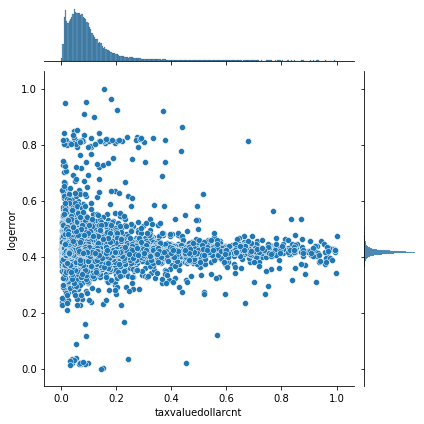

In [18]:
# Question: Is there a relationship between tax value and logerror?

print("Is there a relationship\nbetween tax value and logerror?")
sns.jointplot(x="taxvaluedollarcnt", y="logerror", data=train)
plt.xlabel("Tax Value")
plt.ylabel("Logerror")
plt.show()

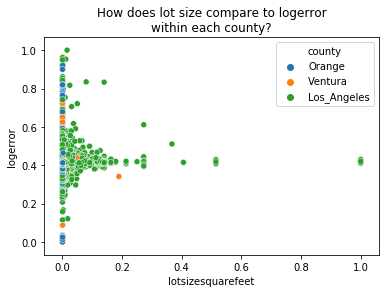

In [19]:
# Question: How does lot size compare to logerror within each county?

sns.scatterplot(x='lotsizesquarefeet', y='logerror',
               data=train, hue='county')
plt.title("How does lot size compare to logerror\nwithin each county?")
plt.show()